# Boston housing data analysis

#### Data load and inspection
 - The data cosist of 7 features and a 1000 rows -> dtype=int64
 - Make: Make is the brand of the sold car -> dtype=object
 - Model is the brand model of the sold car -> dtype=object
 - Year is the year that the car was sold -> dtype=int64
 - Mileage: is the amount of mileage the car has driven -> dtype=int64
 - The condition is the state(Condition) the car is in -> dtype=object
 - Price: The prices the car was sold for -> dtype=float64

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")


In [3]:
cp = pd.read_csv('/Users/mikkelpedersen/Desktop/project vs studio/ML projekter/CarPricesPrediction.csv')
cp.head()

,Unnamed: 0,Make,Model,Year,Mileage,Condition,Price
0,0,Ford,Silverado,2022,18107,Excellent,19094.75
1,1,Toyota,Silverado,2014,13578,Excellent,27321.10
2,2,Chevrolet,Civic,2016,46054,Good,23697.30
3,3,Ford,Civic,2022,34981,Excellent,18251.05
4,4,Chevrolet,Civic,2019,63565,Excellent,19821.85


In [4]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   Make        1000 non-null   object 
 2   Model       1000 non-null   object 
 3   Year        1000 non-null   int64  
 4   Mileage     1000 non-null   int64  
 5   Condition   1000 non-null   object 
 6   Price       1000 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


In [5]:
cp.describe()

,Unnamed: 0,Year,Mileage,Price
count,1000.000000,1000.00000,1000.000000,1000.000000
mean,499.500000,2015.86500,78796.927000,22195.205650
std,288.819436,3.78247,39842.259941,4245.191585
min,0.000000,2010.00000,10079.000000,12613.000000
25%,249.750000,2013.00000,44942.750000,18961.862500
50%,499.500000,2016.00000,78056.500000,22247.875000
75%,749.250000,2019.00000,112366.250000,25510.275000
max,999.000000,2022.00000,149794.000000,31414.900000


In [6]:
cp.rename({'Unnamed: 0' : 'Index'}, axis=1, inplace=True)

In [7]:
cp.head()

,Index,Make,Model,Year,Mileage,Condition,Price
0,0,Ford,Silverado,2022,18107,Excellent,19094.75
1,1,Toyota,Silverado,2014,13578,Excellent,27321.10
2,2,Chevrolet,Civic,2016,46054,Good,23697.30
3,3,Ford,Civic,2022,34981,Excellent,18251.05
4,4,Chevrolet,Civic,2019,63565,Excellent,19821.85


### EDA(Exploratory data analysis)

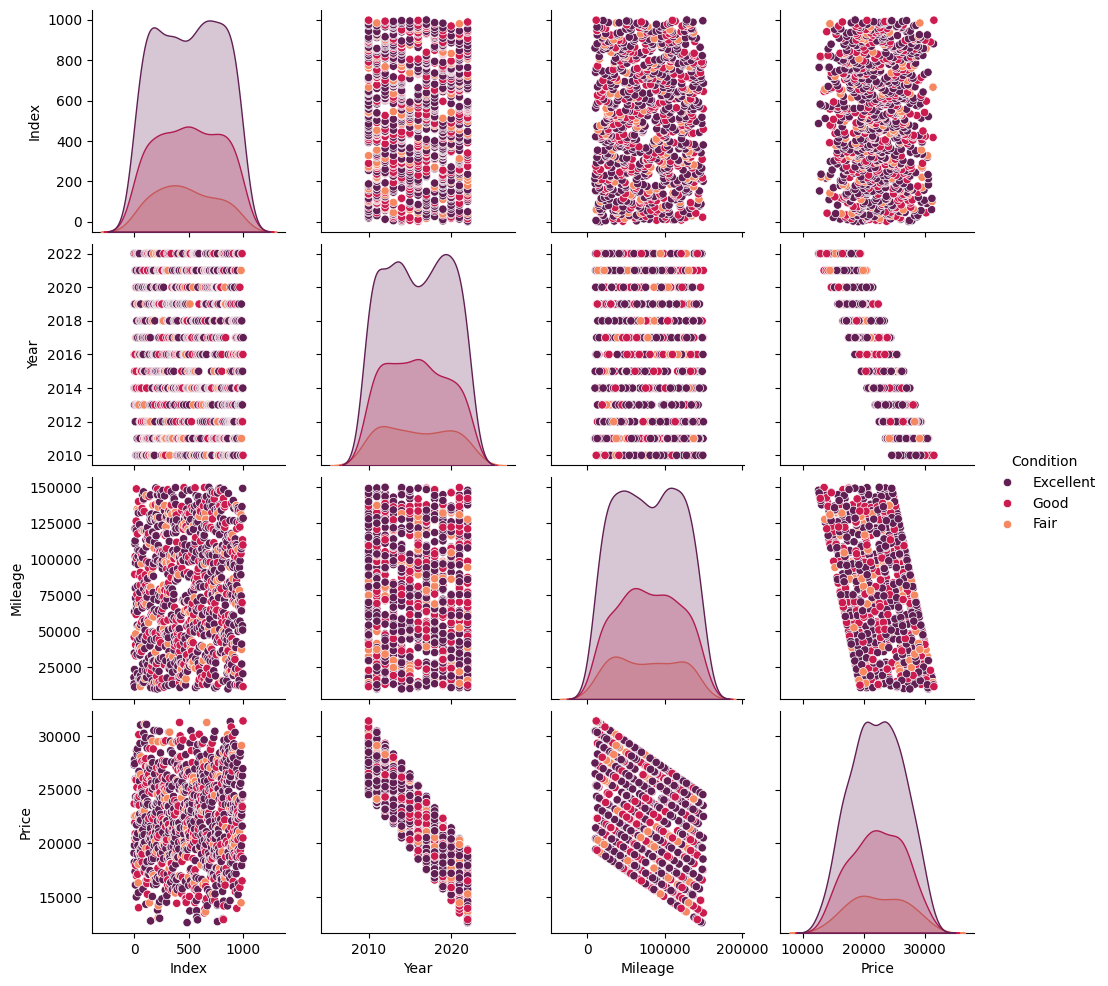

In [8]:
sns.pairplot(cp, palette='rocket', hue='Condition')

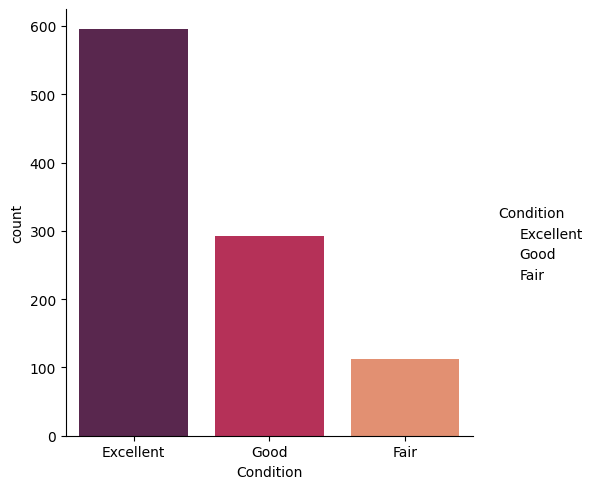

In [9]:
sns.catplot(data=cp, x='Condition', kind='count', palette='rocket')

In [10]:
def suma(data):
    for col in cp[['Condition', 'Model', 'Make']]:
        print(data[col].value_counts())
        print('****' * 8)

In [11]:
suma(cp)

Condition
Excellent    595
Good         292
Fair         113
Name: count, dtype: int64
********************************
Model
Altima       226
Camry        212
Silverado    192
F-150        188
Civic        182
Name: count, dtype: int64
********************************
Make
Chevrolet    209
Toyota       205
Ford         199
Honda        199
Nissan       188
Name: count, dtype: int64
********************************


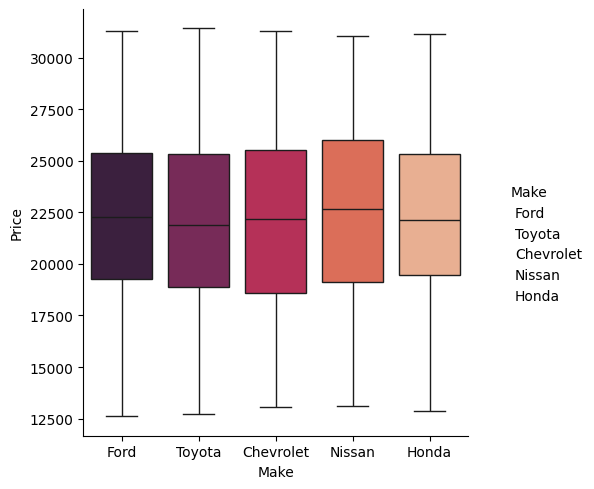

In [20]:
sns.catplot(data=cp, x='Make', y='Price', palette='rocket', kind='box')

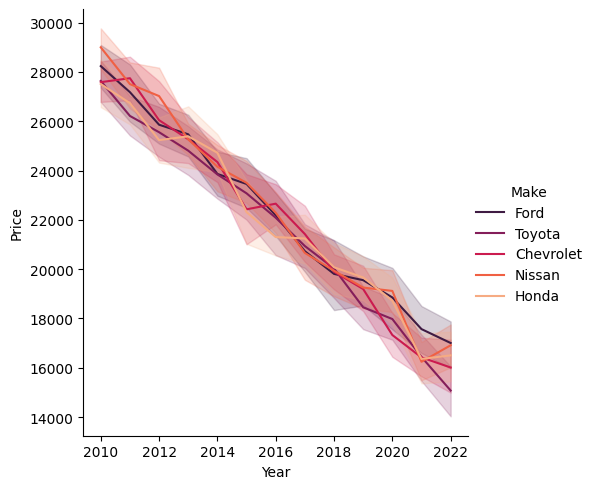

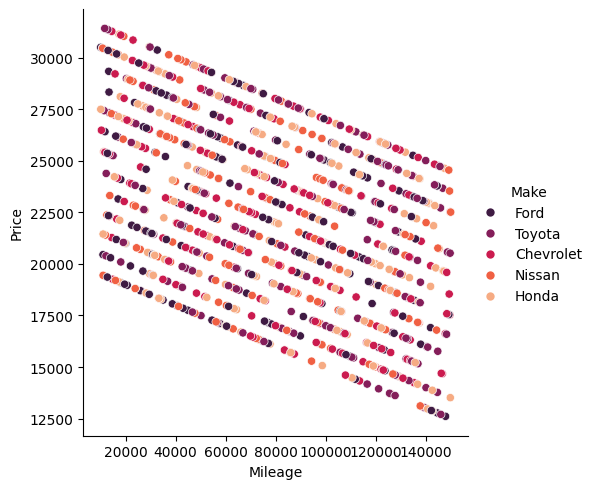

In [27]:
sns.relplot(data=cp, x='Year', y='Price', kind='line', palette='rocket', hue='Make')
sns.relplot(data=cp, x='Mileage', y='Price', kind='scatter', palette='rocket', hue='Make')

## Feature selection

In [28]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split

In [46]:
def cp_label_encoder(data, col_name):
    le = LabelEncoder()
    data[col_name] = le.fit_transform(data[col_name])
    return data

def ord_encoder(data, col_name):
    ordi = OrdinalEncoder()
    data[col_name] = ordi.fit_transform(data[[col_name, col_name, col_name]])
    return data

In [32]:
cp_copy =cp.copy()

cp_label_encoder(cp_copy, 'Make')
cp_copy

,Index,Make,Model,Year,Mileage,Condition,Price
0,0,1,Silverado,2022,18107,Excellent,19094.75
1,1,4,Silverado,2014,13578,Excellent,27321.10
2,2,0,Civic,2016,46054,Good,23697.30
3,3,1,Civic,2022,34981,Excellent,18251.05
4,4,0,Civic,2019,63565,Excellent,19821.85
...,...,...,...,...,...,...,...
995,995,3,Camry,2010,149032,Excellent,24548.50
996,996,0,F-150,2014,20608,Excellent,26969.70
997,997,1,Altima,2016,109851,Good,20507.55
998,998,4,Silverado,2010,11704,Good,31414.90


In [42]:
ord_encoder(cp_copy,  'Model')
cp_copy

,Index,Make,Model,Year,Mileage,Condition,Price
0,0,1,4.0,2022,18107,0.0,19094.75
1,1,4,4.0,2014,13578,0.0,27321.10
2,2,0,2.0,2016,46054,2.0,23697.30
3,3,1,2.0,2022,34981,0.0,18251.05
4,4,0,2.0,2019,63565,0.0,19821.85
...,...,...,...,...,...,...,...
995,995,3,1.0,2010,149032,0.0,24548.50
996,996,0,3.0,2014,20608,0.0,26969.70
997,997,1,0.0,2016,109851,2.0,20507.55
998,998,4,4.0,2010,11704,2.0,31414.90


In [49]:
ord_encoder(cp, 'Model')
ord_encoder(cp, 'Make')
ord_encoder(cp, 'Condition')

,Index,Make,Model,Year,Mileage,Condition,Price
0,0,1.0,4.0,2022,18107,0.0,19094.75
1,1,4.0,4.0,2014,13578,0.0,27321.10
2,2,0.0,2.0,2016,46054,2.0,23697.30
3,3,1.0,2.0,2022,34981,0.0,18251.05
4,4,0.0,2.0,2019,63565,0.0,19821.85
...,...,...,...,...,...,...,...
995,995,3.0,1.0,2010,149032,0.0,24548.50
996,996,0.0,3.0,2014,20608,0.0,26969.70
997,997,1.0,0.0,2016,109851,2.0,20507.55
998,998,4.0,4.0,2010,11704,2.0,31414.90


Excellent = 0   595
Good = 2        292
Fair = 1        113
Name: count, dtype: int64
********************************
Model
Altima = 0    226
Camry = 1       212
Silverado = 4    192
F-150 = 3       188
Civic = 2        182
Name: count, dtype: int64
********************************
Make
Chevrolet = 0    209
Toyota = 4      205
Ford = 1        199
Honda = 2       199
Nissan = 3      188
Name: count, dtype: int64
********************************

In [50]:
suma(cp)

Condition
0.0    595
2.0    292
1.0    113
Name: count, dtype: int64
********************************
Model
0.0    226
1.0    212
4.0    192
3.0    188
2.0    182
Name: count, dtype: int64
********************************
Make
0.0    209
4.0    205
1.0    199
2.0    199
3.0    188
Name: count, dtype: int64
********************************


In [52]:
X = cp.drop(['Price'], axis=1)
y = cp['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Building

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [55]:
# Linear Regression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print('The mean  squared error on the training set is;', round(mse_train,4))

y_pred_test = lr.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print('The mean squared error on the test set is;', round(mse_test,4))

The mean  squared error on the training set is; 0.0042
The mean squared error on the test set is; 0.0046


In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([("classifier", LinearRegression())])

lir_parm_grid = {}

lir_grid_search = GridSearchCV(pipe, lir_parm_grid, cv=10, scoring='neg_mean_squared_error')
lir_grid_search.fit(X_train, y_train)
print('The mean sqaured error after gridsearchcv is: ', lir_grid_search.best_score_)

The mean sqaured error after gridsearchcv is:  -0.004239824135383175


In [70]:
comparesion = pd.DataFrame({'index' : X_test.index,
                            'Intial model' : mse_test,
                            'Grid model' : lir_grid_search.best_score_})

print(comparesion)

     index  Intial model  Grid model
0      521      0.004583    -0.00424
1      737      0.004583    -0.00424
2      740      0.004583    -0.00424
3      660      0.004583    -0.00424
4      411      0.004583    -0.00424
..     ...           ...         ...
295    468      0.004583    -0.00424
296    935      0.004583    -0.00424
297    428      0.004583    -0.00424
298      7      0.004583    -0.00424
299    155      0.004583    -0.00424

[300 rows x 3 columns]


In [75]:
The_prediction = lir_grid_search.predict(X_test)

result = pd.DataFrame({'Index' : X_test['Index'],
                       'Prediction' : The_prediction})

print(result.sample(20))

     Index    Prediction
259    259  24305.806547
294    294  27632.206771
523    523  25102.899682
494    494  20964.048983
362    362  24381.256133
989    989  16505.949101
290    290  21552.488039
101    101  17755.812532
296    296  20625.910658
575    575  13118.111439
879    879  14664.112764
60      60  31034.209100
946    946  22340.002715
935    935  21130.495678
544    544  20964.301956
995    995  24548.454087
613    613  20714.164421
542    542  20557.758531
86      86  22944.391159
305    305  18584.259669
